# Exploration of the GoBike dataset
## by Konstantin Leonenko

## Investigation Overview

In this investigation I wanted to see how the load is spread across the bike sharing network.

## Dataset Overview

Dataset represents almost three years (2017-2019) of records of bike trips across the GoBike network deployed in the SanFrancisco bay area. Information included bike id, start and end station locations and times as well as rider's gender, age and client type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
import random

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike_2017 = pd.read_csv('data/gobike/2017-fordgobike-tripdata.csv')
gobike_2018_01 = pd.read_csv('data/gobike/201801-fordgobike-tripdata.csv')
gobike_2018_02 = pd.read_csv('data/gobike/201802-fordgobike-tripdata.csv')
gobike_2018_03 = pd.read_csv('data/gobike/201803-fordgobike-tripdata.csv')
gobike_2018_04 = pd.read_csv('data/gobike/201804-fordgobike-tripdata.csv')
gobike_2018_05 = pd.read_csv('data/gobike/201805-fordgobike-tripdata.csv')
gobike_2018_06 = pd.read_csv('data/gobike/201806-fordgobike-tripdata.csv')
gobike_2018_07 = pd.read_csv('data/gobike/201807-fordgobike-tripdata.csv')
gobike_2018_08 = pd.read_csv('data/gobike/201808-fordgobike-tripdata.csv')
gobike_2018_09 = pd.read_csv('data/gobike/201809-fordgobike-tripdata.csv')
gobike_2018_10 = pd.read_csv('data/gobike/201810-fordgobike-tripdata.csv')
gobike_2018_11 = pd.read_csv('data/gobike/201811-fordgobike-tripdata.csv')
gobike_2018_12 = pd.read_csv('data/gobike/201812-fordgobike-tripdata.csv')
gobike_2019_01 = pd.read_csv('data/gobike/201901-fordgobike-tripdata.csv')
gobike_2019_02 = pd.read_csv('data/gobike/201902-fordgobike-tripdata.csv')
gobike_2019_03 = pd.read_csv('data/gobike/201903-fordgobike-tripdata.csv')
gobike_2019_04 = pd.read_csv('data/gobike/201904-fordgobike-tripdata.csv')
gobike_2019_05 = pd.read_csv('data/gobike/201905-baywheels-tripdata.csv')
gobike_2019_06 = pd.read_csv('data/gobike/201906-baywheels-tripdata.csv')
# in the july 2019 dataset values are separated by semicolons rather than commas
gobike_2019_07 = pd.read_csv('data/gobike/201907-baywheels-tripdata.csv', delimiter = ';')
gobike_2019_08 = pd.read_csv('data/gobike/201908-baywheels-tripdata.csv')
gobike_2019_09 = pd.read_csv('data/gobike/201909-baywheels-tripdata.csv')
gobike_2019_10 = pd.read_csv('data/gobike/201910-baywheels-tripdata.csv')
df_gobike = pd.DataFrame(data = gobike_2017)
df_gobike = df_gobike.append(gobike_2018_01)
df_gobike = df_gobike.append(gobike_2018_02)
df_gobike = df_gobike.append(gobike_2018_03)
df_gobike = df_gobike.append(gobike_2018_04)
df_gobike = df_gobike.append(gobike_2018_05)
df_gobike = df_gobike.append(gobike_2018_06)
df_gobike = df_gobike.append(gobike_2018_07)
df_gobike = df_gobike.append(gobike_2018_08)
df_gobike = df_gobike.append(gobike_2018_09)
df_gobike = df_gobike.append(gobike_2018_10)
df_gobike = df_gobike.append(gobike_2018_11)
df_gobike = df_gobike.append(gobike_2018_12)
df_gobike = df_gobike.append(gobike_2019_01)
df_gobike = df_gobike.append(gobike_2019_02)
df_gobike = df_gobike.append(gobike_2019_03)
df_gobike = df_gobike.append(gobike_2019_04)
df_gobike = df_gobike.append(gobike_2019_05)
df_gobike = df_gobike.append(gobike_2019_06)
df_gobike = df_gobike.append(gobike_2019_07)
df_gobike = df_gobike.append(gobike_2019_08)
df_gobike = df_gobike.append(gobike_2019_09)
df_gobike = df_gobike.append(gobike_2019_10)



In [6]:
# let's extract start and end station information
df_start_stations = df_gobike[['start_station_id','start_station_latitude','start_station_longitude','start_station_name']]
df_end_stations =  df_gobike[['end_station_id','end_station_latitude','end_station_longitude','end_station_name']]
# start and end information belongs in the rides table, not in the station table.
# let's just merge these
df_start_stations = df_start_stations.rename(columns={'start_station_id':'station_id', 'start_station_latitude':'latitude','start_station_longitude':'longitude','start_station_name':'name'})
df_end_stations = df_end_stations.rename(columns={'end_station_id':'station_id', 'end_station_latitude':'latitude','end_station_longitude':'longitude','end_station_name':'name'})
df_stations = df_start_stations.append(df_end_stations)

# make a copy of the stations dataframe before proceeding with cleaning
df_stations_clean = df_stations.copy()

df_null_stations = df_stations_clean[df_stations_clean.station_id.isnull()]
df_stations_clean.drop(df_null_stations.index, inplace=True)

# cast station id's from floats into ints
df_stations_clean.station_id = df_stations_clean.station_id.astype(int)

# aggregate stations around station_id field
df_stations_clean = df_stations_clean.groupby('station_id', as_index=False).agg({
    'latitude':'mean', 'longitude':'mean', 'name':set})

df_stations_clean['starts'] = df_gobike.groupby('start_station_id', as_index=False).agg( 'count')['bike_id']
df_stations_clean['ends'] = df_gobike.groupby('end_station_id', as_index=False).agg('count')['bike_id']

df_stations_clean['starts'] = df_stations_clean['starts'].fillna(0).astype(float)
df_stations_clean['ends'] = df_stations_clean['ends'].fillna(0).astype(float)

# before cleaning - make a copy of the dataset
df_rides = df_gobike.copy()

drop_columns = ['start_station_name', 'end_station_name',
                'start_station_latitude', 'end_station_latitude',
               'start_station_longitude', 'end_station_longitude']
df_rides.drop(drop_columns, axis=1, inplace=True)

# how many trips don't have either start or end station id's?
null_start_station = df_rides[df_rides.start_station_id.isnull()]
null_end_station = df_rides[df_rides.end_station_id.isnull()]
drop_stations = null_start_station.merge(null_end_station, how='outer')

df_rides.dropna(subset=['start_station_id', 'end_station_id'],inplace=True)

df_rides.start_station_id = df_rides.start_station_id.astype(int)
df_rides.end_station_id = df_rides.end_station_id.astype(int)

df_rides.start_time = pd.to_datetime(df_rides.start_time)
df_rides.end_time = pd.to_datetime(df_rides.end_time)

df_rides.drop (['member_gender', 'member_birth_year', 'user_type', 
                'rental_access_method','bike_share_for_all_trip'], axis=1, inplace=True)

base_color = sb.color_palette()[0]
secondary_color = sb.color_palette()[1]
tertiary_color = sb.color_palette()[2]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ride Duration

As a first step - let's look at the distribution of ride durations. The distribution is clearly unimodal, sharply right-skewed with the center around 400 seconds. This is in line with common sense expectation of a bike ride being approximately 15 minutes long.

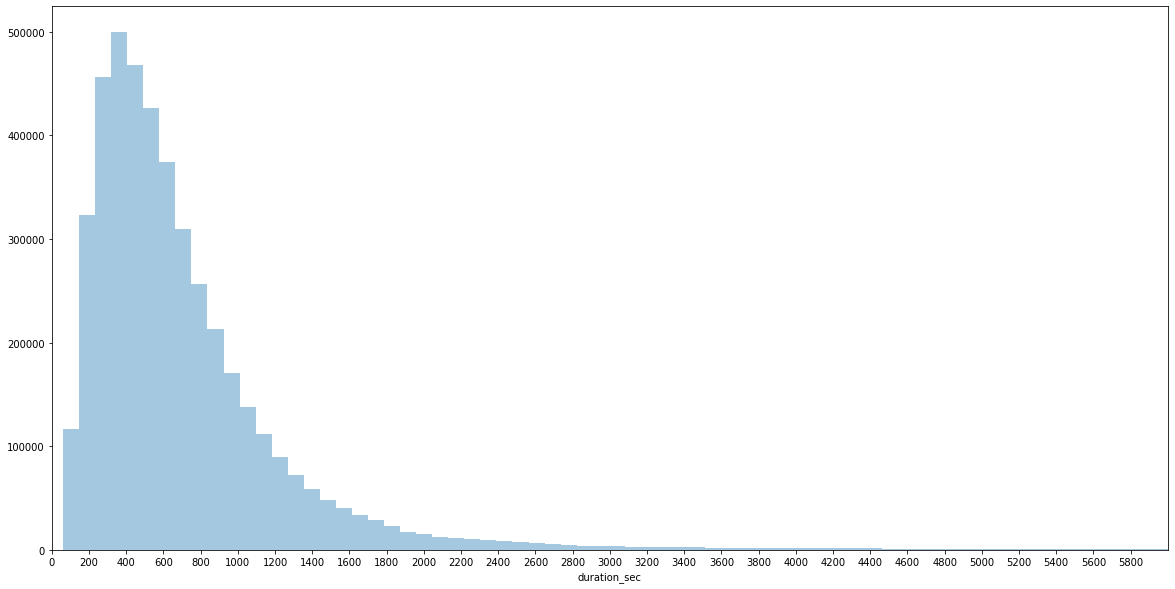

In [4]:
plt.figure(figsize=(20,10))
sb.distplot(df_rides.duration_sec,1000,kde=False);
plt.xlim(0,6000);
plt.xticks(np.arange(0,6000,200));

## Station start/end balance

From the overall grey color of the plot - it looks like on average the start and end stations popularity is mostly well balanced, however colored bar tips tell us that some stations have more starts and some - more ends.

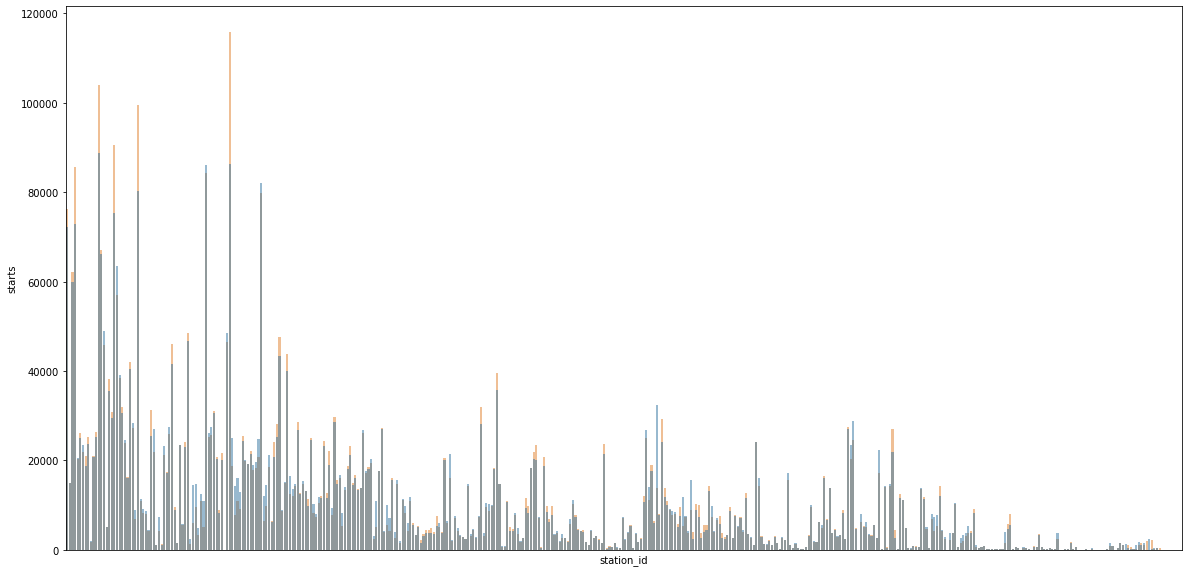

In [7]:
plt.figure(figsize=(20,10))
sb.barplot(data=df_stations_clean, x='station_id', y='ends', color = secondary_color, alpha=0.5);
sb.barplot(data=df_stations_clean, x='station_id', y='starts', color = base_color, alpha=0.5);
# sb.barplot(data=df_stations_clean, x='station_id', y='starts')
plt.xticks([]);

## Start/Stop station scatter plot
In this scatter plot every dot is placed to represent start and end station.
From this visualization it is clear that:
* Travel patterns are clustered around very specific groups of stations.
* Roundtrips, where start and end stations are the same are quite popular.
* Plot is very symmetrical along the diagonal, which means a lot of bikes go back to the same stations they were picked up from

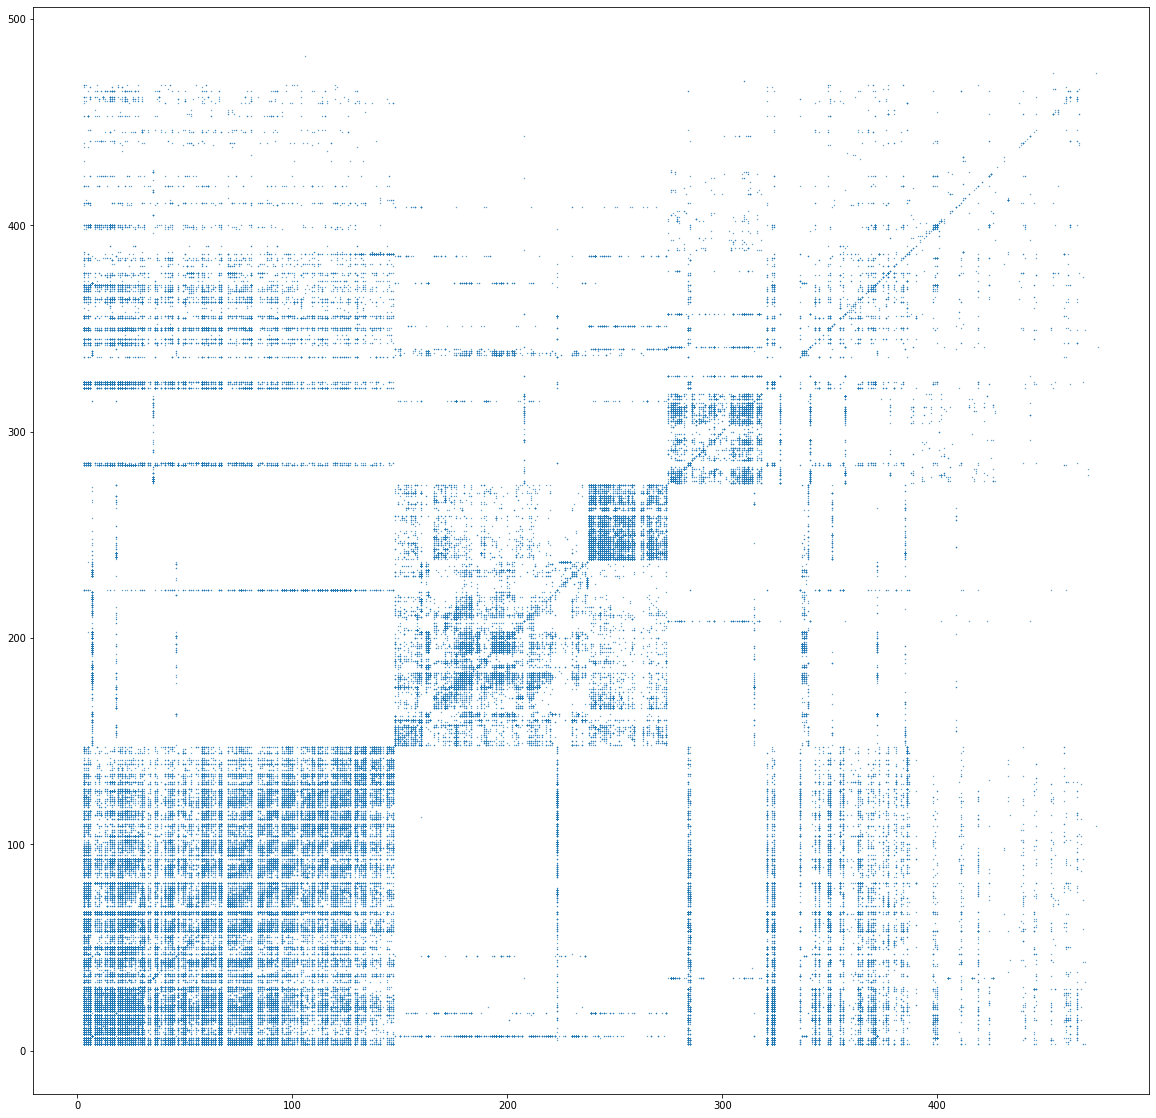

In [8]:
sample = np.random.choice(df_rides.shape[0],200000, replace = False);
sample = df_rides.loc[sample];
plt.figure(figsize=(20,20))
plt.scatter(data = sample, x = 'start_station_id', y = 'end_station_id', alpha=1, s=0.1);

## Round Trip comparison
In this scatter plot blue dots represent round trip times and orange dots - normal trips. It is clear that on average round trips take about three times as long as a-b trips.

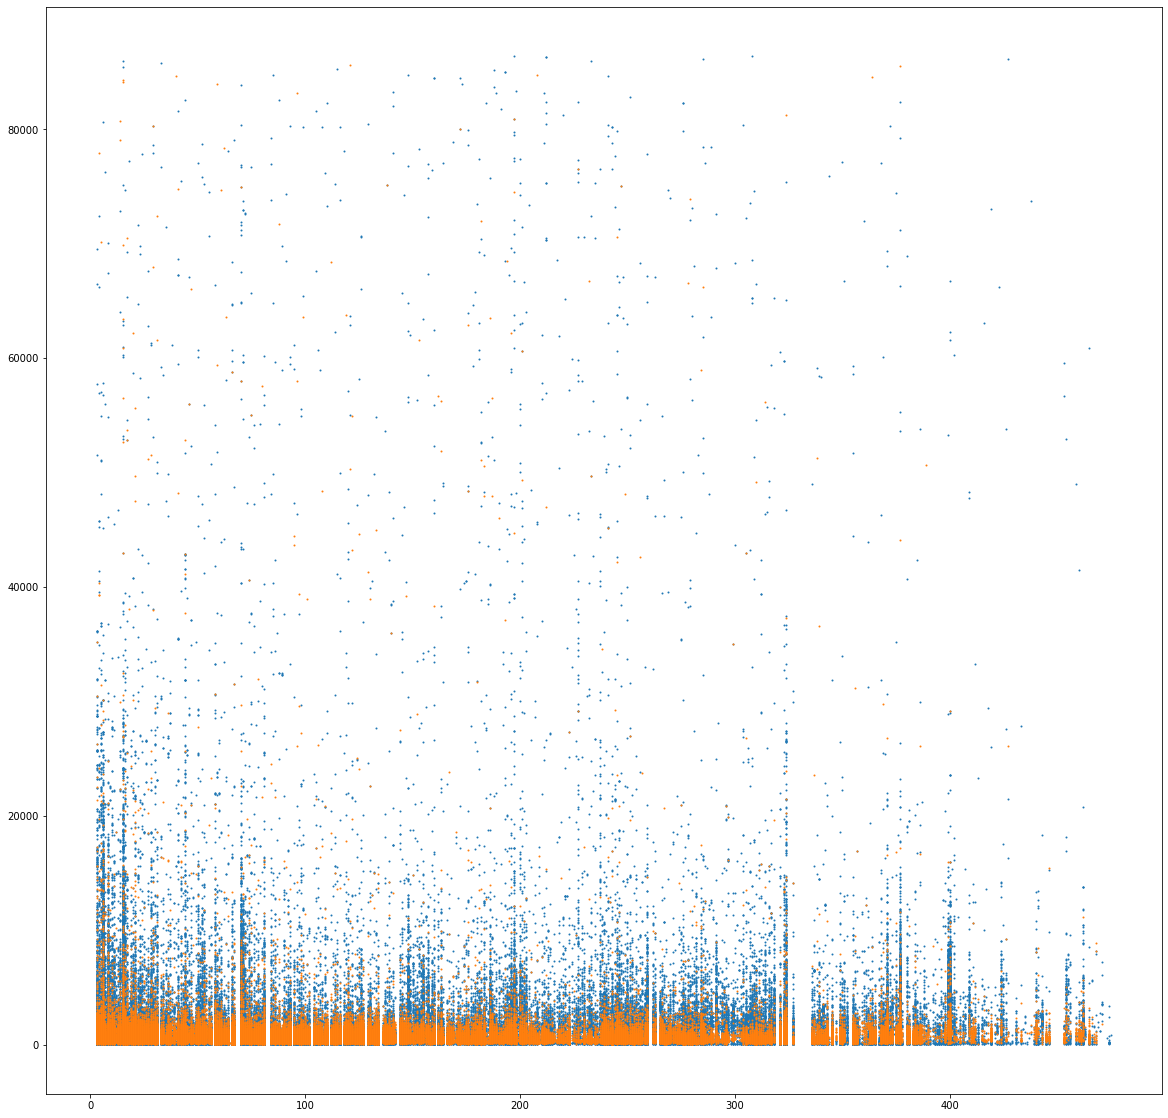

In [19]:
df_roundtrips = df_rides.query('start_station_id == end_station_id')

rides_sample = np.random.choice(df_rides.shape[0],122230, replace = False);
rides_sample = df_rides.loc[rides_sample];

plt.figure(figsize=(20,20))

plt.scatter(data = df_roundtrips, x = 'start_station_id', y = 'duration_sec', alpha=1, s=1);
plt.scatter(data = rides_sample, x = 'start_station_id', y = 'duration_sec', alpha=1, s=1, color=secondary_color);

# plt.legend(['Round trip','Normal']);

## Start/End map

In this scatter plot dots are placed according to their coordinates, and their size represents the amount of transactions. Orange (end) is plotted over blue (start).

(37.7, 37.9)

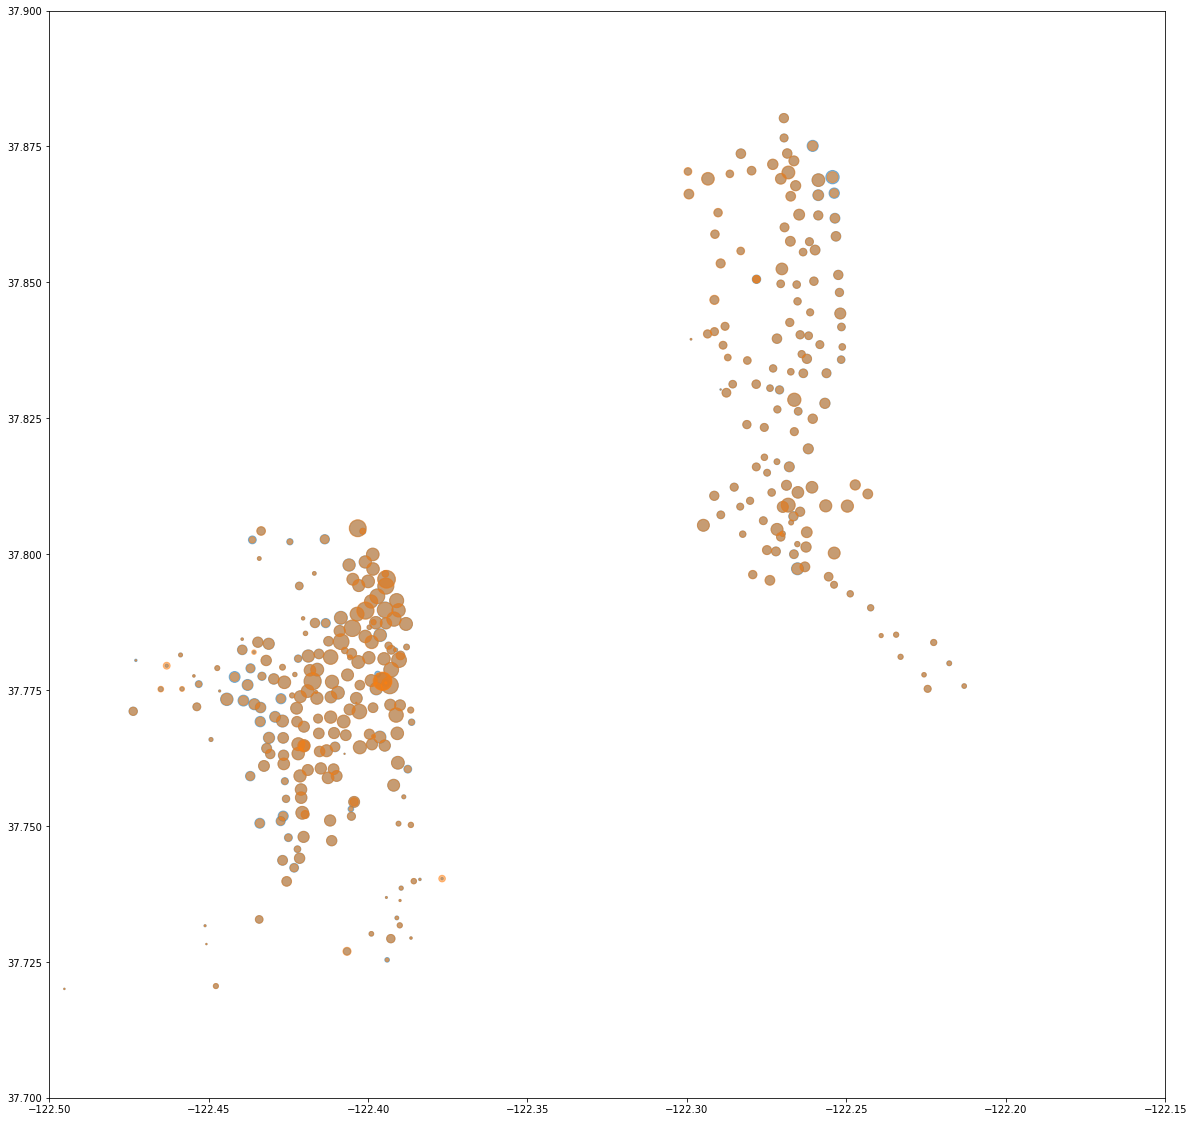

In [11]:
# San Francisco and Berkeley 
plt.figure(figsize=(20,20))
plt.scatter(data = df_stations_clean, x = 'longitude', y = 'latitude', s=df_stations_clean['starts']**0.5, alpha=0.5)
plt.scatter(data = df_stations_clean, x = 'longitude', y = 'latitude', s=df_stations_clean['ends']**0.5, color=secondary_color, alpha=0.5)
plt.xlim(-122.5,-122.15)
plt.ylim(37.7,37.9)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!